In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Week 6 - Advanced Topics in Data Manipulation
#### Subsection 1: Time Series Data

Time series data come up very often, especially in economics, meteorological, government datasets.<br>
Time series models are unique and have their special models. <br>
Before modeling, we would like to gain familiarity with how to use datetime objects and how they relate to time series datasets.

The python standard library has a built-in module called "datetime".
<center> "The datetime module supplies classes for manipulating dates and times" </center>

The documentation pages are located here: https://docs.python.org/3/library/datetime.html

**The most important classes from this module are**:
<ol>
    <li> datetime.date </li>
    <li> datetime.time </li>
    <li> datetime.datetime </li>
    <li> datetime.timedelta = a duration expressing the difference between two date, time, or datetime instances to microsecond resolution</li>
</ol>

___

A note on time zones: 
They are complicated so we will not be covering them.
<ol>
    <li> Aware vs naive </li>
    <li> "datetime and time objects have an optional time zone information attribute, tzinfo, that can be set to an instance of a subclass of the abstract tzinfo class"</li>
    
</ol>

<br>
To prove my point - "Supporting timezones at deeper levels of detail is up to the application. The rules for time adjustment across the world are more political than rational, change frequently, and there is no standard suitable for every application aside from UTC."


A note on time formats:

ISO 8601 is an international standard covering the worldwide exchange and communication of date and time-related data. It is maintained by the International Organization for Standardization (ISO) and was first published in 1988, with updates in 1991, 2000, 2004, and 2019, and an amendment in 2022.The standard provides a well-defined, unambiguous method of representing calendar dates and times in worldwide communications, especially to avoid misinterpreting numeric dates and times when such data is transferred between countries with different conventions for writing numeric dates and times. (From Wikipedia)

<br>

The ISO 8601 format is "YYYY-MM-DD".

For more information on calendars, see this video on the history of the modern calendar: https://www.youtube.com/watch?v=kzprsR2SvrQ

In [11]:
import datetime as dt

In [7]:
#Examples:


#date objects ----------------------------------

#dt.date(year, month, day) 
#dt.date objects have year, month, day only 

#Class methods
#date.today()
#date.fromtimestamp() #Return the local date corresponding to the POSIX timestamp
#date.fromisoformat(date_string)

#Attributes
#1.year
#2. month
#3. day

#Instance methods (common ones):
#1. weekday()
#2. isoweekday()
#3. isocalendar()
#4. .isoformat()
#5. .strftime()



# datetime objects ------------------------------
# dt.datetime(year, month,  day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
# datetime objects have everything in both date and time





#Timedelta (only days, seconds, and microseconds are stored internally)





#date.strftime() creates a string representing the time under the control of an explicit format string
#datetime.strptime() class moethod creates a datetime object from a string representing a date and time and a corresponding format string

In [12]:
tdy = dt.date.today()
tdy


datetime.date(2023, 10, 1)

In [25]:
#examples

#the data object --------
#constrcut dates "estamshnating them"
tdy = dt.date.today()
tdy

print(f"Today is {tdy.day}th of {tdy.month}th month, {tdy.year}")    
###Today is 1th of 10th month, 2023


dt.date.fromisoformat('2022-01-01')
###  datetime.date(2022, 1, 1)


tdy.strftime("%A %d, %B %Y")                 
####  'Sunday 01, October 2023'

print(f"Today is {tdy.strftime('%A %d, %B %Y')}")  
###  Today is Sunday 01, October 2023


#datetime objects----------------
now = dt.datetime.today()
now
###  datetime.datetime(2023, 10, 1, 11, 49, 37, 941721)


print(now.strftime("Today's date is: %A %d, %B %Y and the time is %I:%M:%S %p"))   
###  Today's date is: Sunday 01, October 2023 and the time is 11:50:56 AM


#strptime -- method from the datetime module to parse the input string and convert it into a datetime object.
c_bale_bday = dt.datetime.strptime('January 30, 1975', '%B %d, %Y')   #%B ex of arguments
c_bale_bday
###  datetime.datetime(1975, 1, 30, 0, 0)


#time delta
now - c_bale_bday 
print(f"Christian Bale is {(now - c_bale_bday).days // 365} years old") #floor divide // = cut off all number after the "." 
###  Christian Bale is 48 years old



Today is 1th of 10th month, 2023
Today is Sunday 01, October 2023
Today's date is: Sunday 01, October 2023 and the time is 11:58:39 AM
Christian Bale is 48 years old


In [28]:
#a more useful example of datetime usage 

#time the execution of code 
np.random.seed(seed=1)  #seed will produce the same random numbers

rand_ints = np.random.randint(1, 10000, size=(20))   #range of 1 to 10000
rand_ints
###  array([ 236, 5193,  906, 7814, 2896, 5057,  145, 4226, 7752, 3463, 9395,
###       5397, 5375, 2963, 2517, 8445, 3563, 4765, 8094, 6543])


#time 
start = dt.datetime.now()
counter = 0

for i in range(1, 1000):       #used 1000 to run faster but you can use 10000
     if i in rand_ints:
         counter += 1

print(f"Count is at {counter}")           ###  Count is at 3
end = dt.datetime.now()
elapsed_time = end - start

print(f"The time it took to run the code was: {elapsed_time.total_seconds()} seconds.") 
###  The time it took to run the code was: 0.017839 seconds.



Count is at 3
The time it took to run the code was: 0.017839 seconds.


In [29]:
#read data in 
nvda = pd.read_csv('nvda.csv', parse_dates = [0])

#nvda2 = pd.read_csv('nvda.csv', parse_dates = True)   ##<--different dhow the dtypes.  passing TRUE will not work. 

#nvda.equals(nvda2)   ##<<===checks will return FALSE

nvda.head()




,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
1,2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2,2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
3,2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
4,2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964


In [39]:
nvda.Datetime.iat[0]   #<<==not the same as dt.datetime module not the same object from dt.datetime

Timestamp('2023-08-21 09:30:00-0400', tz='pytz.FixedOffset(-240)')

In [ ]:
#important thing #1: pandas does not use built in datatime ojbects


#important thing #2: to use indexing like weve been doing in the past threes week, we must
        #set the index to our datetime column   (see below)
   



In [30]:
nvda.head()   #without setting the datetime index

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
1,2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2,2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
3,2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
4,2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964


In [32]:
nvda = nvda.set_index('Datetime', drop=True)   #<<===put date in the index to make our lives easier
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964


<Axes: xlabel='Datetime'>

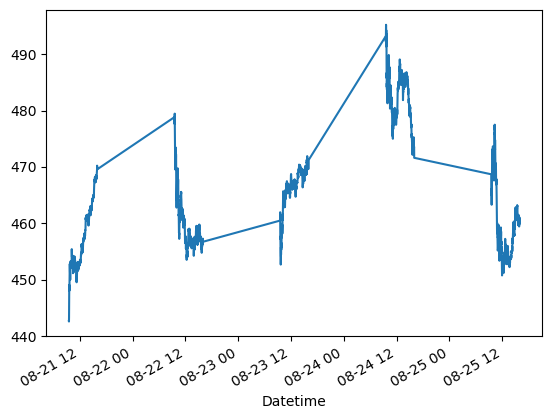

In [33]:
nvda.Close.plot()

In [43]:
nvda

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964
...,...,...,...,...,...,...
2023-08-25 15:55:00-04:00,460.109985,461.939911,460.109985,461.029999,461.029999,367793
2023-08-25 15:56:00-04:00,461.119995,461.440002,460.290009,460.779999,460.779999,251365
2023-08-25 15:57:00-04:00,460.829895,461.109985,460.329987,460.420013,460.420013,212724


In [44]:
nvda.loc['2023-08-21']   ##<<==this is a string, pass date into .loc  


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964
...,...,...,...,...,...,...
2023-08-21 15:55:00-04:00,469.679993,470.649994,469.299988,470.225006,470.225006,429013
2023-08-21 15:56:00-04:00,470.470001,470.470001,469.489990,469.785400,469.785400,324211
2023-08-21 15:57:00-04:00,469.739990,469.791687,469.123291,469.679993,469.679993,244063


In [45]:
nvda.loc['2023-08-21 15:59:00']    ##only returns one row of data (below is indexing and extraction location)

Open            469.875000
High            469.959991
Low             469.329987
Close           469.600006
Adj Close       469.600006
Volume       624021.000000
Name: 2023-08-21 15:59:00-04:00, dtype: float64

In [53]:
nvda.loc['2023-08-23 12:00:00']

Open            468.720001
High            469.079987
Low             468.589996
Close           468.739899
Adj Close       468.739899
Volume       169551.000000
Name: 2023-08-23 12:00:00-04:00, dtype: float64

In [34]:
nvda.loc['2023-08-21 15:59:00', 'Close']     ##slicing only the close column

469.6000061035156

In [35]:
#ranges 
nvda.loc['2023-08-21': '2023-08-22']  ##this is a range parameter

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474
2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301
2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528
2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964
...,...,...,...,...,...,...
2023-08-22 15:55:00-04:00,456.429993,457.350006,456.410004,457.235107,457.235107,325303
2023-08-22 15:56:00-04:00,457.339996,457.648987,457.119995,457.278290,457.278290,217475
2023-08-22 15:57:00-04:00,457.239990,457.359985,456.880005,456.950012,456.950012,185149


In [38]:
#built in for time series data (datetime index)   WONT GET TESTED ON THIS

nvda.first('1D')   ##D is for day ##1D = one day

nvda.last('2D')   #D is for day ##2D = two days

nvda.at_time('9:30')   ##only date indexes with 9:30

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-22 09:30:00-04:00,481.350006,481.869995,478.500000,478.845001,478.845001,3699459
2023-08-23 09:30:00-04:00,460.478394,460.478394,460.478394,460.478394,460.478394,2317047
2023-08-24 09:30:00-04:00,493.540009,493.540009,493.182190,493.182190,493.182190,8345148
2023-08-25 09:30:00-04:00,470.119995,470.799988,467.320007,468.695007,468.695007,2830792


In [39]:
nvda.index   ##you can see the type of index returned.  this is case the datetimeindex

DatetimeIndex(['2023-08-21 09:30:00-04:00', '2023-08-21 09:31:00-04:00',
               '2023-08-21 09:32:00-04:00', '2023-08-21 09:33:00-04:00',
               '2023-08-21 09:34:00-04:00', '2023-08-21 09:35:00-04:00',
               '2023-08-21 09:36:00-04:00', '2023-08-21 09:37:00-04:00',
               '2023-08-21 09:38:00-04:00', '2023-08-21 09:39:00-04:00',
               ...
               '2023-08-25 15:50:00-04:00', '2023-08-25 15:51:00-04:00',
               '2023-08-25 15:52:00-04:00', '2023-08-25 15:53:00-04:00',
               '2023-08-25 15:54:00-04:00', '2023-08-25 15:55:00-04:00',
               '2023-08-25 15:56:00-04:00', '2023-08-25 15:57:00-04:00',
               '2023-08-25 15:58:00-04:00', '2023-08-25 15:59:00-04:00'],
              dtype='datetime64[ns, pytz.FixedOffset(-240)]', name='Datetime', length=1945, freq=None)

In [40]:
nvda.index.minute

Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            ...
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', name='Datetime', length=1945)

In [43]:
nvda.index.hour   

Int64Index([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
            ...
            15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
           dtype='int64', name='Datetime', length=1945)

In [45]:
#filtering ------------
#equivalent to the above using boolean maasking

(nvda.index.hour == 9) ##return a large array of booleans  (TRUE & FALSE)

nvda[(nvda.index.hour == 9) & (nvda.index.minute == 30)]     ##same as nvda.at_time('9:30') 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940
2023-08-22 09:30:00-04:00,481.350006,481.869995,478.500000,478.845001,478.845001,3699459
2023-08-23 09:30:00-04:00,460.478394,460.478394,460.478394,460.478394,460.478394,2317047
2023-08-24 09:30:00-04:00,493.540009,493.540009,493.182190,493.182190,493.182190,8345148
2023-08-25 09:30:00-04:00,470.119995,470.799988,467.320007,468.695007,468.695007,2830792


In [60]:
#getting every fitth minute 

#by default .loc on the datafrom will assume your are looking at rows
nvda.loc[nvda.index.minute %5 == 0]     #use mod 5 to find the 5th minute.  30/5 = 0   35/5 = 0, etc.....

#using analougous datetime attributes
nvda.loc[nvda.index.day == 23]



,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-23 09:30:00-04:00,460.478394,460.478394,460.478394,460.478394,460.478394,2317047
2023-08-23 09:31:00-04:00,460.459991,462.239990,459.589996,461.959991,461.959991,501016
2023-08-23 09:32:00-04:00,461.989990,463.119904,457.529999,458.084991,458.084991,529334
2023-08-23 09:33:00-04:00,458.049988,459.942291,457.040100,457.244995,457.244995,361087
2023-08-23 09:34:00-04:00,457.079987,458.700012,455.609985,457.630005,457.630005,426385
...,...,...,...,...,...,...
2023-08-23 15:55:00-04:00,470.200104,470.599396,469.520996,469.609985,469.609985,264874
2023-08-23 15:56:00-04:00,469.575012,470.000000,469.500000,469.967987,469.967987,269059
2023-08-23 15:57:00-04:00,469.929993,470.517395,469.869995,470.450104,470.450104,251142


In [48]:
#groupby -- use with time series

##retrieves the mean from each columns based on the datetime index
nvda.groupby (pd.Grouper(freq='1D')).mean()  #example.  need pd.grouper along with .groupby

nvda.groupby (pd.Grouper(freq='2D')).mean()   #example  (every other day)

nvda.groupby (pd.Grouper(freq='Y')).mean()   #example   (one year of data) can also use .min or max too 



,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-31 00:00:00-04:00,465.161465,465.662138,464.665095,465.153055,465.153055,203346.660668


In [51]:
#resampling --------------(groupby)

#recall aggregration??
nvda.resample('1D').max()  #max, mean, max, std.....(use aggration function like max, mean....)

#df.agg()   #will be on the midterm --  df.agg = summarizes a bunch of rows in a particular category into one matric (ref wk4)
nvda.resample('1D').agg({
    'Open': np.min,         #can pass in function like np.min or string like 'max'
    'High': 'max', 
    'Low': 'min',  
    'Close': 'last',
    'Volume': 'mean'
})



,Open,High,Low,Close,Volume
Datetime,,,,,
2023-08-21 00:00:00-04:00,442.559998,470.649994,442.220001,469.600006,166719.131443
2023-08-22 00:00:00-04:00,453.649994,481.869995,453.330994,456.720001,187941.568123
2023-08-23 00:00:00-04:00,452.329987,472.000000,452.079987,471.220001,148207.473008
2023-08-24 00:00:00-04:00,472.179993,496.500000,471.589996,471.619995,282933.448718
2023-08-25 00:00:00-04:00,450.660004,478.049988,450.239990,460.179993,230632.930591


In [77]:
nvda.resample('30T').agg({
    'Open': np.min, 
    'High': 'max', 
    'Low': 'min',  
    'Close': 'last',
    'Volume': 'mean'
})

##T = minutes 
##or can use "30min"

##aggreating by 30 mins will get more rows 

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-08-21 09:30:00-04:00,442.559998,454.010010,442.220001,453.299988,404898.666667
2023-08-21 10:00:00-04:00,451.135010,455.899994,450.549988,451.600006,230394.533333
2023-08-21 10:30:00-04:00,451.250000,454.299988,450.640015,451.709991,136529.448276
2023-08-21 11:00:00-04:00,449.579987,453.250000,448.749908,451.760010,137492.137931
2023-08-21 11:30:00-04:00,451.679993,453.700012,451.100098,452.700012,94169.066667
...,...,...,...,...,...
2023-08-25 13:30:00-04:00,452.140015,454.359985,452.119995,453.769989,93141.966667
2023-08-25 14:00:00-04:00,453.788391,459.549988,453.000000,459.390015,147588.933333
2023-08-25 14:30:00-04:00,457.790100,462.236908,457.330109,461.980011,168897.500000


For more information on offset strings, view: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

___

#### Subsection 2: Missing Data

Why deal with missing data? <br>
There are some main ways to deal with missing data in order of complexity:
<ol>
    <li> Dropping rows/records </li>
    <li> Imputation </li>
    <li> Interpolation </li>
</ol>

In [ ]:
## reason #1 -- is that you could end up with biases 

## reason #2 -- avoid dirty data 

## sparse = lots of missing data 

## how to resolve -- drop rows or columns


In [56]:
nvda = pd.read_csv("nvda.csv", parse_dates = [0]) 
nvda = nvda.set_index('Datetime')
nvda = nvda.first('1D')

In [57]:
nvda.shape

(388, 6)

In [63]:
#lets make a copy of our original dataframe 
nvda_o = nvda.copy()

np.random.seed(seed=1)

#create some randomw indicies to replace with NA values 
na_idx_volume = np.random.randint(0,nvda.shape[0]-1,10)     ##dont need to know about randint##
na_idx_close = np.random.randint(0,nvda.shape[0]-1,10)   

#set them to NA in our dataframe

for idx in na_idx_volume:
     nvda.iat[idx, 5] = None          ##these changes are done INPLACE 
for idx in na_idx_close:
     nvda.iat[idx,3] = np.nan 

    

In [66]:
nvda.isna()         ##check how many NA values you have in a dataset

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,False,False,False,False,False,False
2023-08-21 09:31:00-04:00,False,False,False,False,False,False
2023-08-21 09:32:00-04:00,False,False,False,False,False,False
2023-08-21 09:33:00-04:00,False,False,False,False,False,False
2023-08-21 09:34:00-04:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-08-21 15:55:00-04:00,False,False,False,False,False,False
2023-08-21 15:56:00-04:00,False,False,False,False,False,False
2023-08-21 15:57:00-04:00,False,False,False,False,False,False


In [92]:
nvda.isna().sum()    ##check how many NA values you have in a dataset

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [70]:
#example1 = dropping records and columns 

#nvda.dropna(axis = 0, subset = ['Volume'], inplace = True
nvda.dropna(axis = 0, subset = ['Volume'], inplace = False)

nvda.dropna(axis = 0, subset = ['Close', 'Volume'], inplace = False)



,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 09:30:00-04:00,444.940002,445.130005,442.220001,442.625000,442.625000,2412940.0
2023-08-21 09:31:00-04:00,442.625885,444.489990,442.320007,442.566010,442.566010,313474.0
2023-08-21 09:32:00-04:00,442.559998,444.589996,442.330109,443.350006,443.350006,288301.0
2023-08-21 09:33:00-04:00,443.475006,446.880005,442.799988,446.674988,446.674988,513528.0
2023-08-21 09:34:00-04:00,446.600311,448.260010,446.470001,448.140015,448.140015,498964.0
...,...,...,...,...,...,...
2023-08-21 15:55:00-04:00,469.679993,470.649994,469.299988,470.225006,470.225006,429013.0
2023-08-21 15:56:00-04:00,470.470001,470.470001,469.489990,469.785400,469.785400,324211.0
2023-08-21 15:57:00-04:00,469.739990,469.791687,469.123291,469.679993,469.679993,244063.0


In [71]:
nvda.shape   

(388, 6)

In [73]:
na_idx_close   #check for NAs  at 50th row

array([237, 281, 178, 276, 254, 357, 252, 156,  50,  68])

In [74]:
nvda.iloc[50, ]   ##isolate the 50th row 

Open            454.250000
High            454.289886
Low             452.568909
Close                  NaN
Adj Close       453.290009
Volume       229881.000000
Name: 2023-08-21 10:20:00-04:00, dtype: float64

In [75]:
nvda.iloc[45:53, ]  ##display the 45th to the 53rd rows 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 10:15:00-04:00,453.769989,454.059998,453.200012,453.230011,453.230011,196521.0
2023-08-21 10:16:00-04:00,453.170013,454.420013,453.117706,453.760010,453.760010,233210.0
2023-08-21 10:17:00-04:00,453.600006,454.519989,453.350006,454.200012,454.200012,188276.0
2023-08-21 10:18:00-04:00,454.200012,454.299988,453.561493,454.000000,454.000000,121248.0
2023-08-21 10:19:00-04:00,453.900085,454.899994,453.630005,454.279999,454.279999,209991.0
2023-08-21 10:20:00-04:00,454.250000,454.289886,452.568909,NaN,453.290009,229881.0
2023-08-21 10:21:00-04:00,453.190186,454.000000,452.429993,452.855011,452.855011,232177.0
2023-08-21 10:22:00-04:00,452.855011,453.279999,452.350006,452.630005,452.630005,189096.0


In [80]:
#example of 2 - Imputation -- uses mathematical data to fill in missing data 

#Imputation fills in NA values

#nvda.fillna(value = 0)    ##fill in all NA with ZEROES
nvda.fillna(value=0).iloc[45:53,]    #can change the value to anything / any number
##2023-08-21 10:20:00-04:00	454.250000	454.289886	452.568909	0.000000	453.290009	229881.0

##another example of fill in to replace NA using mean and max
nvda.fillna({
     'Close' : nvda.Close.mean(), 
     'Volumne' : nvda.Volume.max()
 }).iloc[45:53,]


##ffill  = fill forward -- uses the prior value 
nvda.ffill().iloc[45:53, ]

##bbill = fill back -- uses the next valve
nvda.bfill().iloc[45:53, ]



,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-21 10:15:00-04:00,453.769989,454.059998,453.200012,453.230011,453.230011,196521.0
2023-08-21 10:16:00-04:00,453.170013,454.420013,453.117706,453.760010,453.760010,233210.0
2023-08-21 10:17:00-04:00,453.600006,454.519989,453.350006,454.200012,454.200012,188276.0
2023-08-21 10:18:00-04:00,454.200012,454.299988,453.561493,454.000000,454.000000,121248.0
2023-08-21 10:19:00-04:00,453.900085,454.899994,453.630005,454.279999,454.279999,209991.0
2023-08-21 10:20:00-04:00,454.250000,454.289886,452.568909,454.279999,453.290009,229881.0
2023-08-21 10:21:00-04:00,453.190186,454.000000,452.429993,452.855011,452.855011,232177.0
2023-08-21 10:22:00-04:00,452.855011,453.279999,452.350006,452.630005,452.630005,189096.0


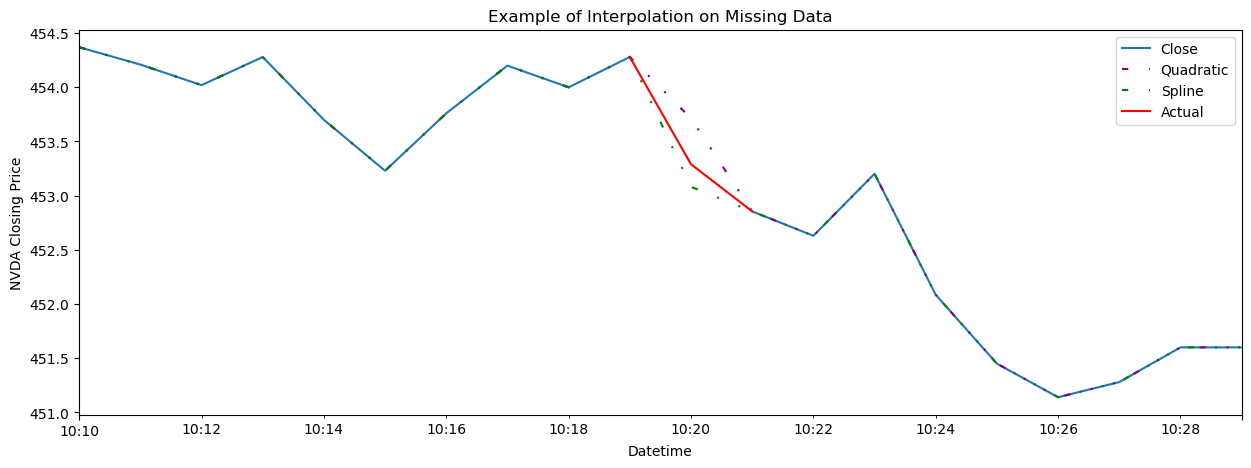

In [84]:
#example of 3 = interpolation -- makes an educated line to fill in NA Values 

quad_interp = nvda.interpolate(method='polynomial', order=2)  ##quadragic = 2
spline_interp = nvda.interpolate(method='spline', order=5)    ## 

fig, ax = plt.subplots(figsize=(15,5))
nvda.Close.iloc[40:60].plot(ax=ax)     #doesnt plot NA data (blue line)

##
quad_interp.Close.iloc[40:60].plot(ax=ax, linestyle=(0,(3, 10, 1, 10, 1, 10)), color = 'purple', label = 'Quadratic')
spline_interp.Close.iloc[40:60].plot(ax=ax, linestyle=(0,(3, 10, 1, 10, 1, 10)), color = 'green', label = 'Spline')
nvda_o.Close.iloc[49:52].plot(ax=ax, color = 'red', label = 'Actual')
plt.ylabel ('NVDA Closing Price')
plt.legend()
plt.title("Example of Interpolation on Missing Data")
plt.show()



___

#### Subsection 3: Long vs Wide Data

Hadley Wickham coined this term in his paper: "Tidy Data" 2014. 
<br>Wide data is what we have been seeing so far. Long data is when there are only one value per row. You can go from wide to long and vice-versa. When to use wide or long?
<ul>
    <li> Wide: for regular analysis </li>
    <li> Long: for plotting and space saving (why?) </li>
</ul>

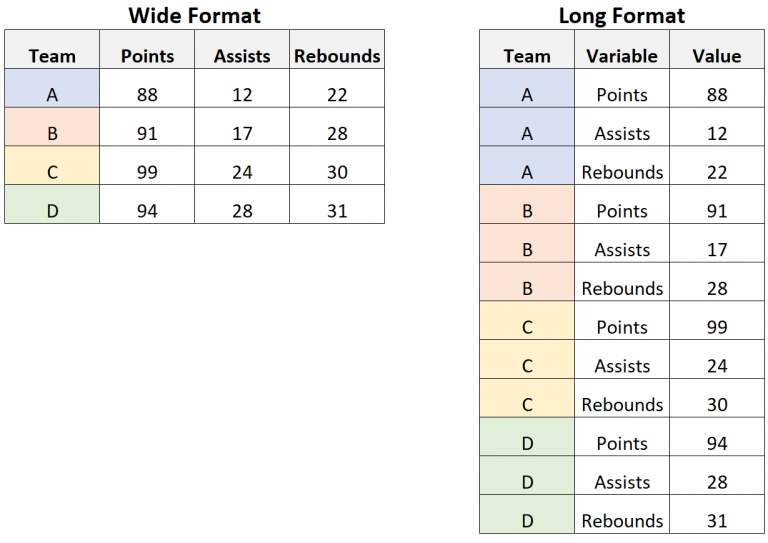

In [86]:
#wide data 
team = ['A', 'B', 'C', 'D']
points = [88, 91, 99, 94]
assists = [12, 17, 24, 28]
rebounds = [22, 28, 30, 31]

df = pd.DataFrame({
    'Team': team, 
    'Points': assists, 
    "Rebounds": rebounds
})

df

,Team,Points,Rebounds
0,A,12,22
1,B,17,28
2,C,24,30
3,D,28,31


In [91]:
#methods => the method is called melt()

long_df = df.melt(id_vars='Team', value_vars = df.columns[1:])
long_df

,Team,variable,value
0,A,Points,12
1,B,Points,17
2,C,Points,24
3,D,Points,28
4,A,Rebounds,22
5,B,Rebounds,28
6,C,Rebounds,30
7,D,Rebounds,31


In [96]:
#go from long to wide 
#method => pivot 

wide_df = long_df.pivot(index = 'Team', columns = 'variable', values = 'value').reset_index()
wide_df

variable,Team,Points,Rebounds
0,A,12,22
1,B,17,28
2,C,24,30
3,D,28,31


In [ ]:
#lecture covered

#time series 
#missing values 
#wide vs long data 

#from a birdseye view -- weve been covering tools

#commands on the midterm
